# Importing Libraries

In [75]:
# Importing libraries needed for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score


# Data Exploration and Visualisation

*  Loading the dataset
*  Analysing key statistics
*  Visualising relationships

## Loading the Titanic datasets

We first load the datasets that will be used

In [76]:
# Loading the dataset through google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# Loading the datasets
df_train = pd.read_csv('/content/drive/MyDrive/Amalitech/Titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Amalitech/Titanic/test.csv')

Now we inspect the first few rows in the dataset

In [78]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1
1,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0
2,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0
3,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1


In [79]:
# displaying the information about both the train and test datasets
print("train dataset")
df_train.info()
print("\n\n")
print("test dataset")
df_test.info()

train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        160 non-null    object 
 10  Embarked     710 non-null    object 
 11  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB



test dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non

## Analysing key statistics

In [80]:
# Calculation key statistics like mean, median, standard deviation
df_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,712.000000,712.000000,575.000000,712.000000,712.000000,712.000000,712.000000
mean,444.405899,2.308989,29.807687,0.492978,0.390449,31.819826,0.383427
std,257.465527,0.833563,14.485211,1.060720,0.838134,48.059104,0.486563
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,439.500000,3.000000,28.500000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,39.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


We then check the unique values present in each of the columns

In [81]:
# Checking unique values for Sex
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [82]:
# Checking unique values for Ticket
df_train.Ticket.unique()

array(['1601', '239854', 'PC 17483', '392091', 'C.A. 31921', '8475',
       'PC 17757', '367228', '345763', '13213', '4137', 'CA. 2343',
       '113792', 'A/4. 39886', '19928', 'A/5. 13032', '362316', 'C 7075',
       '4133', 'A/5. 3336', '11813', 'PC 17585', 'SW/PP 751', '349233',
       '223596', '349204', '4579', 'PC 17756', 'SOTON/OQ 392089',
       '349218', 'C.A. 24579', '110564', 'S.O.P. 1166', '237565',
       'A/5 3540', '229236', '250648', '248738', '382649', 'C.A. 29178',
       '2671', '234604', '312991', '350046', '113786', 'PC 17754',
       'STON/O 2. 3101293', '348124', '370365', '7553', '13507', '347088',
       '113760', '113773', '113798', 'C 7076', 'A/4 45380', 'P/PP 3381',
       '231919', 'LINE', '239855', '347054', 'Fa 265302',
       'STON/O2. 3101279', '347082', 'W/C 14208', '2672', '3101295',
       '113789', '17421', '36209', '365226', 'CA. 2314', 'A/5 3594',
       'PC 17608', 'PC 17569', 'SC/Paris 2123', '250644', '219533',
       '239865', '335677', '29750

In [83]:
# Checking unique values for Cabin
df_train.Cabin.unique()

array([nan, 'C95', 'A26', 'C78', 'D15', 'E49', 'C52', 'C104', 'A5',
       'F G73', 'E44', 'B96 B98', 'D30', 'C45', 'G6', 'C70',
       'B57 B59 B63 B66', 'B80', 'F E69', 'C106', 'E8', 'D9', 'E68',
       'D17', 'B58 B60', 'C125', 'B18', 'C83', 'B3', 'F33', 'C92', 'E121',
       'B22', 'E33', 'C23 C25 C27', 'E67', 'B35', 'C85', 'F2', 'E12',
       'A14', 'B86', 'A10', 'D45', 'C47', 'D33', 'D6', 'C91', 'C62 C64',
       'C65', 'B101', 'A7', 'A31', 'D49', 'D11', 'D35', 'E101', 'B69',
       'B102', 'C7', 'C2', 'C124', 'C82', 'B4', 'A34', 'D26', 'C110',
       'A19', 'B42', 'A16', 'B78', 'B94', 'B50', 'E34', 'C99', 'C118',
       'D10 D12', 'E46', 'B39', 'B19', 'C68', 'B37', 'A20', 'B30', 'A24',
       'D56', 'E58', 'E25', 'E36', 'F4', 'T', 'D', 'C126', 'C32',
       'C22 C26', 'E17', 'C90', 'D19', 'E24', 'D47', 'E38', 'B82 B84',
       'B49', 'E50', 'B28', 'C93', 'F G63', 'D21', 'E77', 'C46', 'E10',
       'D20', 'A32', 'C123', 'A23', 'E40', 'B20', 'A36', 'D36', 'B77',
       'B73', 'C54

In [84]:
# Checking unique values for Embarked
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [85]:
# checking for duplicates
df_train.duplicated().sum()

0

Now we extract useful columns from the dataset for better training of the model

In [86]:
# Extract titles from the 'Name' column
df_train['Title'] = df_train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Display unique titles in the training dataset
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Col', 'Miss', 'Rev', 'Major', 'Master', 'Dr', 'Mlle',
       'Lady', 'Sir', 'Ms', 'Jonkheer', 'Don'], dtype=object)

In [87]:
# Checking the unfamiliar titles presesnt in the dataset and their accurate classification

df_train.query('Title == "Mlle"')
df_train.query('Title == "Jonkheer"')
df_train.query('Title == "Don"')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
630,31,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,0,Don


Mademoiselle or demoiselle is a French courtesy title, abbreviated `Mlle` or 'Dlle', traditionally given to an unmarried woman. The equivalent in English is `Miss`.

`Jonkheer` or jonkvrouw is literally translated as 'young lord' or 'young lady'. In this dataset, the title was used against the name of a male. Hence, it will be replaced with `Mr`.

The title `Don` is derived from the Latin word 'dominus', meaning 'master of a household', with roots in the Roman Republic's classical antiquity. This can be replaced with `Mr` or `Sir`.

`Rev` could be classified as `Professional`, since clergy are professionals in the field of religion.

`Dr` can also be classified as `Professional` because it is typically used by individuals who have earned a doctoral degree. It indicates a level of expertise or professional achievement.

`Lady` could be classified as `Noble`, as it explicitly aligns with the titles of aristocratic status. The same goes for `Countess` and `Sir`.

`Capt`, `Major` and `Col` can all be classified under `Military`.

In [88]:
title_mapping = {
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Ms': 'Mrs',
    'Dona': 'Mrs',
    'Don': 'Mr',
    'Jonkheer': 'Mr',
    'Capt': 'Military',
    'Rev': 'Professional',
    'Major': 'Military',
    'Col': 'Military',
    'Dr': 'Professional',
    'Lady': 'Noble',
    'Countess': 'Noble',
    'Sir': 'Noble'
}

# Replace the 'Title' column in both DataFrames
df_train['Title'] = df_train['Title'].replace(title_mapping)
df_test['Title'] = df_test['Title'].replace(title_mapping)

df_train['Title'].unique()

array(['Mr', 'Mrs', 'Military', 'Miss', 'Professional', 'Master', 'Noble'],
      dtype=object)

Dropping unnecessary columns in the dataset

In [89]:
# Dropping the columns that are not useful for the analysis
df_train.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)

## Visualising relationships between features

<Axes: xlabel='Sex', ylabel='Survived'>

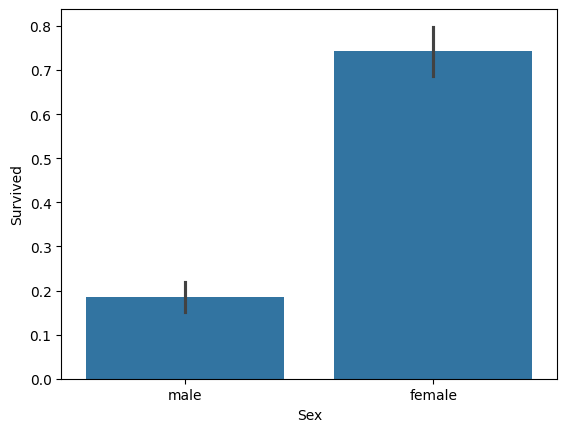

In [90]:
# Visualising relationships between survival rate and sex
sns.barplot(x='Sex', y='Survived', data=df_train)

<Axes: xlabel='Pclass', ylabel='Survived'>

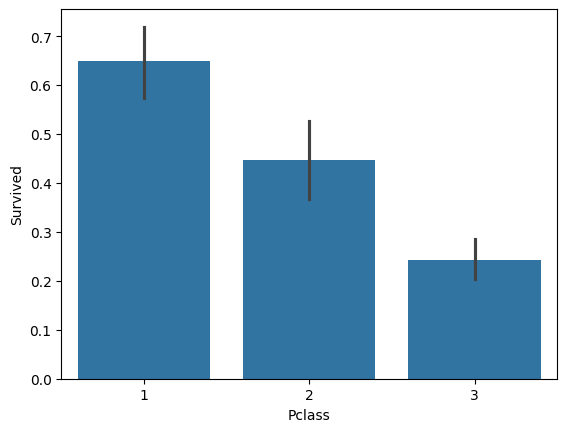

In [91]:
# Visualising relationship between survival rate and class
sns.barplot(x='Pclass', y='Survived', data=df_train)

Now we create groups using the Age and plot the survival rate by the Age Group. This is to be able to easily visualise the Age column and gain insights from it

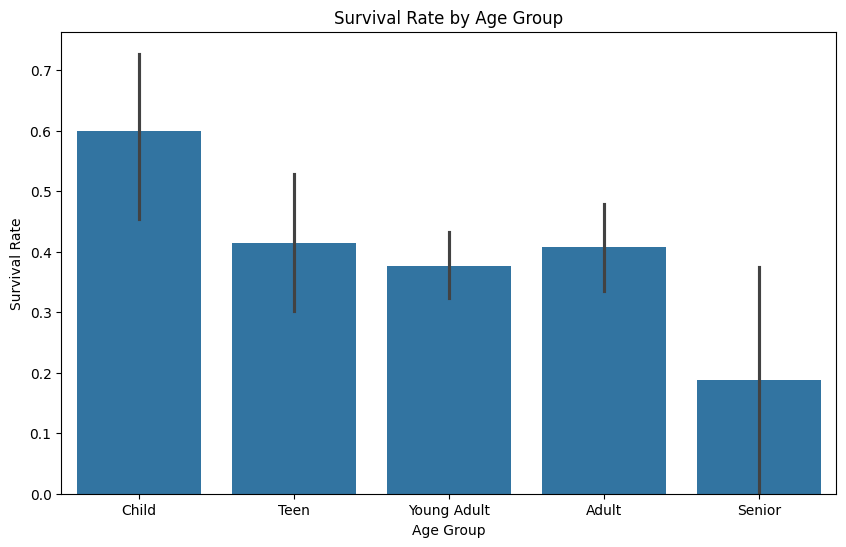

In [92]:
# Plotting Survival Rate by Age

# Create age groups
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Plotting Survival Rate by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df_train)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


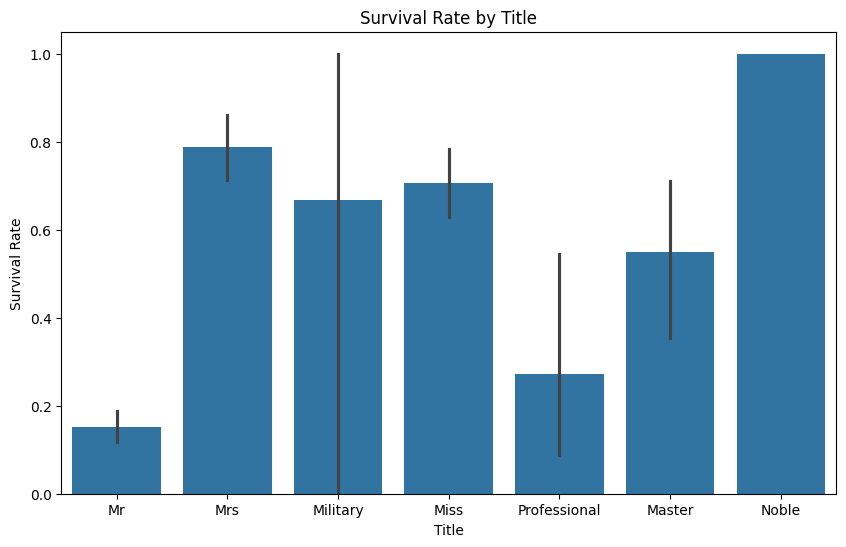

In [93]:
# Plotting Survival Rate by Title
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=df_train)
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.show()

# Data Cleaning and Preprocessing

* Handling missing values
* Encoding categorical values
* Normalising numerical features
* Splitting the dataset into training and validation sets

## Handling missing values

In [94]:
df_train.shape

(712, 10)

In [95]:
# Counting missing values in the training data
df_train.isnull().sum().sort_values(ascending=False)

,0
Age,137
AgeGroup,137
Embarked,2
Pclass,0
Sex,0
SibSp,0
Parch,0
Fare,0
Survived,0
Title,0


In [96]:
# Counting missing values in the test data
df_test.isnull().sum().sort_values(ascending=False)

,0
Age,40
AgeGroup,40
Pclass,0
Sex,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Title,0


In [97]:
# checking the percentage of values missing for Age
df_train.Age.isna().sum()/df_train.shape[0]*100

19.241573033707866

In [98]:
# checking the percentage of values missing for Cabin
df_train.AgeGroup.isna().sum()/df_train.shape[0]*100

19.241573033707866

In [99]:
# checking the percentage of values missing for Embarked
df_train.Embarked.isna().sum()/df_train.shape[0]*100

0.2808988764044944

## Encoding Categorical Variables

In [100]:
# Identifying categorical columns by checking the informating of columns in the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    712 non-null    int64   
 1   Sex       712 non-null    object  
 2   Age       575 non-null    float64 
 3   SibSp     712 non-null    int64   
 4   Parch     712 non-null    int64   
 5   Fare      712 non-null    float64 
 6   Embarked  710 non-null    object  
 7   Survived  712 non-null    int64   
 8   Title     712 non-null    object  
 9   AgeGroup  575 non-null    category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 51.1+ KB


In [101]:
# Transforming categorical data with the type being object and category
cols = df_train.select_dtypes(include=['object', 'category']).columns

for col in cols:
  encode = LabelEncoder()
  df_train[col] = encode.fit_transform(df_train[col])
  if col in df_test.columns:
    df_test[col] = encode.transform(df_test[col])

In [102]:
# Inspecting the dataframe
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title,AgeGroup
0,3,1,NaN,0,0,56.4958,2,1,3,5
1,2,1,NaN,0,0,0.0000,2,0,3,5
2,1,1,NaN,0,0,221.7792,2,0,3,5
3,3,0,18.0,0,1,9.3500,2,1,4,3
4,2,0,31.0,1,1,26.2500,2,1,4,4
...,...,...,...,...,...,...,...,...,...,...
707,3,0,NaN,0,0,7.8792,1,1,2,5
708,1,0,35.0,0,0,512.3292,0,1,2,4
709,3,0,48.0,1,3,34.3750,2,0,4,0
710,1,1,47.0,0,0,38.5000,2,0,3,0


## Further Handling Missing Values

In [103]:
# Filling in Missing Data
# Impute missing values in Age and AgeGroup with the median
imputer = SimpleImputer(strategy='median')
df_train['Age'] = imputer.fit_transform(df_train[['Age']])
df_test['Age'] = imputer.transform(df_test[['Age']])
df_test['AgeGroup'] = imputer.fit_transform(df_test[['AgeGroup']])

# Filling in Embarked with the mode
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

Checking again for missing values

In [104]:
df_train.isnull().sum().sort_values(ascending=False)

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Survived,0
Title,0
AgeGroup,0


In [105]:
# Checking the info about the datasets again
print("train dataset")
df_train.info()
print("\n\n")
print("test dataset")
df_test.info()

train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
 8   Title     712 non-null    int64  
 9   AgeGroup  712 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 55.8 KB



test dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Par

In [106]:
# Prepare train and test data by extracting the features and labels
features = df_train.drop('Survived', axis=1)
label = df_train['Survived']
X_test = df_test

In [107]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,3,1,28.5,0,0,56.4958,2,3,5
1,2,1,28.5,0,0,0.0000,2,3,5
2,1,1,28.5,0,0,221.7792,2,3,5
3,3,0,18.0,0,1,9.3500,2,4,3
4,2,0,31.0,1,1,26.2500,2,4,4


In [108]:
label.head()

,Survived
0,1
1,0
2,0
3,1
4,1


In [109]:
# Checking the correlation of columns in the dataset
corr_matrix = df_train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Fare,0.275499
Parch,0.084178
SibSp,-0.026115
Title,-0.063605
Age,-0.072766
AgeGroup,-0.090631
Embarked,-0.183764
Pclass,-0.348007
Sex,-0.549171


# Feature Engineering

* Generating new features
* Preforming feature selection

## Generating new features

In [110]:
# Generating new features aside the Title and AgeGroup which have already been generated
features['FamilySize'] = features['SibSp'] + features['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

features['isAlone'] = features['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
df_test['isAlone'] = df_test['FamilySize'].apply(lambda x: 1 if x == 1 else 0)


In [111]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FamilySize,isAlone
0,3,1,28.5,0,0,56.4958,2,3,5,1,1
1,2,1,28.5,0,0,0.0000,2,3,5,1,1
2,1,1,28.5,0,0,221.7792,2,3,5,1,1
3,3,0,18.0,0,1,9.3500,2,4,3,2,0
4,2,0,31.0,1,1,26.2500,2,4,4,3,0


Now we can use correlation analysis to perform feature engineering

In [112]:
# Checking the correlating between features
corr_matrix = features.corr()
corr_matrix
# corr_matrix['Survived'].sort_values(ascending=False)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FamilySize,isAlone
Pclass,1.000000,0.145052,-0.320559,0.097900,0.040467,-0.556540,0.191653,-0.153501,0.249944,0.086694,0.127530
Sex,0.145052,1.000000,0.075511,-0.100430,-0.256527,-0.206986,0.121994,-0.013874,0.065689,-0.202343,0.320104
Age,-0.320559,0.075511,1.000000,-0.238338,-0.162256,0.104382,-0.022680,0.462599,-0.369122,-0.244676,0.194899
SibSp,0.097900,-0.100430,-0.238338,1.000000,0.392269,0.127011,0.059692,-0.254052,-0.074696,0.874420,-0.581104
Parch,0.040467,-0.256527,-0.162256,0.392269,1.000000,0.177235,0.044352,-0.117347,-0.251001,0.789292,-0.582477
Fare,-0.556540,-0.206986,0.104382,0.127011,0.177235,1.000000,-0.257834,-0.005736,-0.121082,0.178264,-0.250084
Embarked,0.191653,0.121994,-0.022680,0.059692,0.044352,-0.257834,1.000000,0.029440,-0.055368,0.063239,0.070847
Title,-0.153501,-0.013874,0.462599,-0.254052,-0.117347,-0.005736,0.029440,1.000000,0.023182,-0.231479,0.052178
AgeGroup,0.249944,0.065689,-0.369122,-0.074696,-0.251001,-0.121082,-0.055368,0.023182,1.000000,-0.182250,0.217021
FamilySize,0.086694,-0.202343,-0.244676,0.874420,0.789292,0.178264,0.063239,-0.231479,-0.182250,1.000000,-0.695123


In [113]:
# Check correlation matrix
correlation_matrix = features.corr()

# Find features with high correlation, that is, > 0.7
import numpy as np
high_correlation_features = np.where(abs(correlation_matrix) > 0.7)
high_correlation_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                          for x, y in zip(*high_correlation_features) if x != y]

print("Highly Correlated Features:", high_correlation_pairs)


Highly Correlated Features: [('SibSp', 'FamilySize'), ('Parch', 'FamilySize'), ('FamilySize', 'SibSp'), ('FamilySize', 'Parch')]


In [114]:
# Dropping one of each pair of highly correlated features
features.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df_test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [115]:
X_columns=features.columns

## Performing normalisation on the numerical features in the dataset

In [116]:
# Normalising numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply scaler to numerical columns
features = scaler.fit_transform(features)
X_test = scaler.transform(X_test)

In [117]:
features

array([[ 0.82956755,  0.74242727, -0.08113533, ...,  1.10492876,
        -0.55633858,  0.80034555],
       [-0.37094484,  0.74242727, -0.08113533, ...,  1.10492876,
        -0.55633858,  0.80034555],
       [-1.57145722,  0.74242727, -0.08113533, ...,  1.10492876,
        -0.55633858,  0.80034555],
       ...,
       [ 0.82956755, -1.34693328,  1.41700669, ..., -1.52973057,
         1.96266345, -1.24946032],
       [-1.57145722,  0.74242727,  1.34017889, ..., -1.52973057,
        -0.55633858,  0.80034555],
       [-1.57145722,  0.74242727, -0.08113533, ...,  1.10492876,
        -0.55633858,  0.80034555]])

Splitting the dataset into training and validation sets

In [118]:
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size=0.2, random_state=42)

In [119]:
y_train

,Survived
375,1
344,0
526,0
24,0
234,0
...,...
71,0
106,0
270,0
435,0


In [120]:
X_train.shape, X_val.shape

((569, 9), (143, 9))

Now we perform further feature selection using the `RandomForestClassifier` to identify the most important features in the dataset and drop the ones of low importance.

In [121]:
# Converting back to DataFrame for further feature selection
X = pd.DataFrame(X_train, columns=X_columns)

# X_train_df = pd.DataFrame(X_train, columns=X_columns)
# X_val_df = pd.DataFrame(X_val, columns=X_columns)
# X_test_df = pd.DataFrame(X_test, columns=X_columns)

In [122]:
print(X_train.shape)  # This should show something like (n_samples, n_features)
print(len(X_columns))  # This should match n_features in X_train.shape[1]

(569, 9)
9


In [123]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'features' is the feature set and 'label' is the target variable
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Get feature importance
importances = model_rf.feature_importances_
feature = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

      Feature  Importance
3        Fare    0.246092
1         Sex    0.235002
2         Age    0.186725
5       Title    0.089923
0      Pclass    0.086950
7  FamilySize    0.058428
6    AgeGroup    0.043864
4    Embarked    0.037135
8     isAlone    0.015882


In [124]:
feature

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'AgeGroup',
       'FamilySize', 'isAlone'],
      dtype='object')

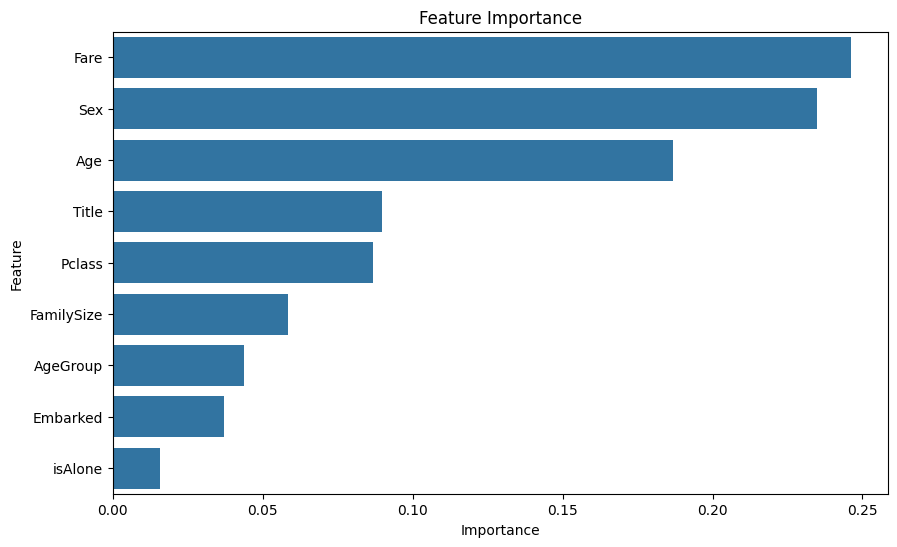

In [125]:
# Visualising the level of importance of features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

We're selecting `0.07` as a threshold because there was a significant reduction in importance values after `0.186` where the next value was approximately `0.8`. This can be seem from the visulaisation above. The accuracy of the model reduced after setting the threshold at 0.17, where the significant reduction starts. Hence we would make it `0.07` to check if the accuracy of the model increases

In [127]:
# Drop features with low importance
threshold = 0.07
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']
X_selected = X[important_features]


In [131]:
important_features

,Feature
3,Fare
1,Sex
2,Age
5,Title
0,Pclass


In [128]:
X_train

array([[-0.37094484, -1.34693328, -1.96341633, ..., -1.0027987 ,
         0.70316243, -1.24946032],
       [ 0.82956755,  0.74242727,  2.72307922, ..., -0.47586684,
        -0.55633858,  0.80034555],
       [ 0.82956755,  0.74242727, -0.42686041, ...,  0.57799689,
        -0.55633858,  0.80034555],
       ...,
       [ 0.82956755,  0.74242727,  0.64872873, ..., -1.52973057,
        -0.55633858,  0.80034555],
       [ 0.82956755,  0.74242727, -0.42686041, ...,  0.57799689,
        -0.55633858,  0.80034555],
       [ 0.82956755,  0.74242727, -0.58051601, ...,  0.57799689,
        -0.55633858,  0.80034555]])

In [129]:
X_selected

,Fare,Sex,Age,Title,Pclass
0,-0.183649,-1.346933,-1.963416,-0.914071,-0.370945
1,-0.501190,0.742427,2.723079,0.144171,0.829568
2,-0.500236,0.742427,-0.426860,0.144171,0.829568
3,-0.498154,0.742427,-0.426860,0.144171,0.829568
4,-0.121182,0.742427,0.418245,0.144171,-0.370945
...,...,...,...,...,...
564,-0.512122,0.742427,-0.350033,0.144171,0.829568
565,-0.501190,0.742427,-0.081135,0.144171,0.829568
566,-0.498154,0.742427,0.648729,0.144171,0.829568
567,-0.506483,0.742427,-0.426860,0.144171,0.829568


In [130]:
y_train

,Survived
375,1
344,0
526,0
24,0
234,0
...,...
71,0
106,0
270,0
435,0


Now we can go ahead and perform a second split of the dataset with the selected features

In [132]:
X_train_selected, X_val_selected, y_train, y_val = train_test_split(X_selected, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [133]:
X_train.shape, X_val.shape

((569, 9), (143, 9))

In [134]:
X_train_selected.shape, X_val_selected.shape

((455, 5), (114, 5))

# Model Selection and Training

* Training
* Evaluation
* Hyperparamenter tuning
* Compare models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

To ensure we find the best model, we will train eight models and display their results

In [135]:
# Classifiers to evaluate
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'Bagging Classifier': BaggingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Naive Bayes': GaussianNB()
}

In [136]:
# Evaluating each classifier
results = []
for name, model in models.items():
    # model_name = model.__class__.__name__
    # print(f"\nTraining and evaluating {model_name}...")
    print(f"\nTraining and evaluating {name}...")
    model.fit(X_train_selected, y_train)

    y_val_pred = model.predict(X_val_selected)
    y_pred_proba = model.predict_proba(X_val_selected)[:, 1]


    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    results.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })


Training and evaluating Random Forest...
Accuracy: 0.7456
Precision: 0.6458
Recall: 0.7209
F1 Score: 0.6813
ROC AUC: 0.8475

Training and evaluating Ada Boost...
Accuracy: 0.7982
Precision: 0.7174
Recall: 0.7674
F1 Score: 0.7416
ROC AUC: 0.8669

Training and evaluating Bagging Classifier...
Accuracy: 0.7632
Precision: 0.6739
Recall: 0.7209
F1 Score: 0.6966
ROC AUC: 0.8169

Training and evaluating Logistic Regression...
Accuracy: 0.7544
Precision: 0.6471
Recall: 0.7674
F1 Score: 0.7021
ROC AUC: 0.8464

Training and evaluating KNN...
Accuracy: 0.7719
Precision: 0.6977
Recall: 0.6977
F1 Score: 0.6977
ROC AUC: 0.8285

Training and evaluating Decision Tree...
Accuracy: 0.7105
Precision: 0.6087
Recall: 0.6512
F1 Score: 0.6292
ROC AUC: 0.6988

Training and evaluating SVM...
Accuracy: 0.8070
Precision: 0.7333
Recall: 0.7674
F1 Score: 0.7500
ROC AUC: 0.8795

Training and evaluating Naive Bayes...
Accuracy: 0.8158
Precision: 0.7115
Recall: 0.8605
F1 Score: 0.7789
ROC AUC: 0.8903


# Model Optimisation

## Grid Search

In [143]:
# Paramenter grids for grid search
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'Ada Boost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5, 1.0]
    },
    'Bagging Classifier': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.7, 1.0],
        'max_features': [0.5, 0.7, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'max_iter': [100, 200, 300, 500]
        # 'penalty': ['l2', 'elasticnet'],  # Added 'elasticnet'
        # 'solver': ['lbfgs', 'saga'],  # 'lbfgs' with 'l2', and 'saga' with 'elasticnet'
        # 'l1_ratio': [0.1, 0.5, 0.9]  # Only used with 'elasticnet'
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale']
        # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        # 'gamma': ['scale', 'auto'],
        # 'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
    },
    'Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    }
}

Since accuracy is our top priority and computational resources/time are less of a concern, Grid Search may be the better choice because it exhaustively evaluates all possibilities within the grid. However, it can be slow.

In [138]:
# Perform GridSearchCV for each model
best_models = {}
for name, model in models.items():
    print(f"\nStarting Grid Search for {name}...")

    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',  # Use accuracy as the scoring metric
        n_jobs=-1,  # Use all processors
        verbose=2  # Print the progress
    )

    # Fit GridSearchCV
    grid_search.fit(X_train_selected, y_train)

    # Output results
    print(f"\n{name} Results:")
    print(f"Best Score: {grid_search.best_score_:.3f}")
    print(f"Best Parameters: {grid_search.best_params_}")

    # Save the best model
    best_models[name] = grid_search.best_estimator_


Starting Grid Search for Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Random Forest Results:
Best Score: 0.813
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}

Starting Grid Search for Ada Boost...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Ada Boost Results:
Best Score: 0.809
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}

Starting Grid Search for Bagging Classifier...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Bagging Classifier Results:
Best Score: 0.835
Best Parameters: {'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}

Starting Grid Search for Logistic Regression...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Logistic Regression Results:
Best Score: 0.815
Best Parameters: {'C': 0.1, 'max_iter': 100}

Starting Grid Search for KNN...
Fitting 

## Randomised Search

In [63]:
# best_models = {}
# for name, model in models.items():
#     random_search = RandomizedSearchCV(
#         model,
#         param_distributions=param_grids[name],
#         n_iter=20,
#         cv=5,
#         scoring='accuracy',
#         n_jobs=-1,
#         random_state=42
#     )
#     random_search.fit(X_train_selected, y_train)

#     print(f"\n{name} Results:")
#     print(f"Best Score: {random_search.best_score_:.3f}")
#     print(f"Best Parameters: {random_search.best_params_}")

#     best_models[name] = random_search.best_estimator_

## Model Evaluation After Optimisation

In [139]:
# Making predictions
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_val_selected)
    results[name] = {
        'Accuracy': accuracy_score(y_val, y_val_pred),
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred),
        'ROC-AUC': roc_auc_score(y_val, y_val_pred)
    }


In [140]:
# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Random Forest        0.815789   0.711538  0.860465  0.778947  0.824599
Ada Boost            0.815789   0.711538  0.860465  0.778947  0.824599
Bagging Classifier   0.815789   0.711538  0.860465  0.778947  0.824599
Logistic Regression  0.815789   0.711538  0.860465  0.778947  0.824599
KNN                  0.815789   0.711538  0.860465  0.778947  0.824599
Decision Tree        0.815789   0.711538  0.860465  0.778947  0.824599
SVM                  0.815789   0.711538  0.860465  0.778947  0.824599
Naive Bayes          0.815789   0.711538  0.860465  0.778947  0.824599


In [141]:
# Displaying the training and validation scores for each model
for name, model in models.items():
    print(f'The training score for {name} is:', (model.score(X_train_selected, y_train) * 100), '%')
    print('Validation accuracy:', accuracy_score(y_val, model.predict(X_val_selected)))

The training score for Random Forest is: 99.12087912087912 %
Validation accuracy: 0.7456140350877193
The training score for Ada Boost is: 82.19780219780219 %
Validation accuracy: 0.7982456140350878
The training score for Bagging Classifier is: 97.14285714285714 %
Validation accuracy: 0.7631578947368421
The training score for Logistic Regression is: 82.19780219780219 %
Validation accuracy: 0.7543859649122807
The training score for KNN is: 84.17582417582418 %
Validation accuracy: 0.7719298245614035
The training score for Decision Tree is: 99.12087912087912 %
Validation accuracy: 0.7105263157894737
The training score for SVM is: 82.85714285714286 %
Validation accuracy: 0.8070175438596491
The training score for Naive Bayes is: 78.68131868131869 %
Validation accuracy: 0.8157894736842105


# Testing and Submission

In [142]:
# Converting the test dataset to a DataFrame to make predictions
df_test = pd.DataFrame(df_test, columns=X_columns)

# Making predictions on the test dataset
best_model = best_models['Random Forest']
predictions = best_model.predict(df_test[important_features])

# Loading the test dataset to get the 'PassengerId' column
test_df = pd.read_csv('/content/drive/MyDrive/Amalitech/Titanic/test.csv')

# Creating a submission dataframe
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

# Saving the submission dataframe to a CSV file and placing it in a google drive folder for easy access
submission.to_csv('/content/drive/MyDrive/Amalitech/Titanic/submission.csv', index=False)

# Displaying the first few rows of the submission dataframe
submission.head()

,PassengerId,Survived
0,566,0
1,161,0
2,554,0
3,861,0
4,242,0
